# Norma
Es el tamaño de unn vector y se representa con $||\bar{v}||$. La norma cumple las siguientes propiedades:
- $||\bar{v}|| \geq 0$
- $||\bar{v}|| = 0 \Leftrightarrow \bar{v} = \bar{0}$
- $||\bar{v_1} +\bar{v_2}|| \leq  ||\bar{v_1}|| +||\bar{v_2}|| $ (desigualdad del triángulo) 
- $||a\bar{v}|| = |a|  \cdot||\bar{v}||$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
v1 = np.array([2,7])
v2 = np.array([3,5])

v1v2 = v1 + v2
v1v2

array([ 5, 12])

In [3]:
#norma (v1+v2) <= norma (v1) +  norma(v2)
norma_v1v2 = np.linalg.norm(v1v2)
norma_v1 = np.linalg.norm(v1) 
norma_v2 = np.linalg.norm(v2)

print(norma_v1v2 <= norma_v1 + norma_v2)

True


In [4]:
v1 = np.array([0,0,2,7])
v2 = np.array([0,0,3,5])

v1_aux = [v1[2], v1[3], v2[2], v2[3]]
v1v2 = np.array([0,0,5,12])

(0.0, 15.0)

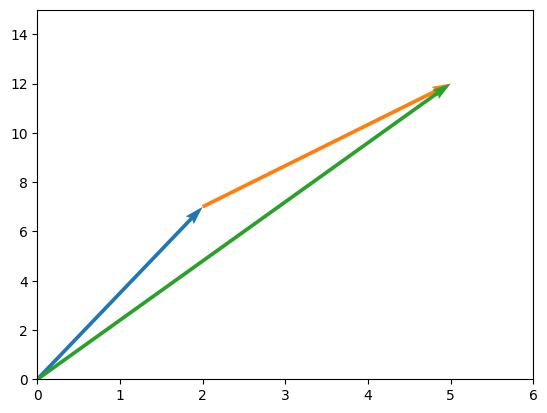

In [5]:
plt.quiver([v1[0], v1_aux[0], v1v2[0] ],
           [v1[1], v1_aux[1], v1v2[1] ],
           [v1[2], v1_aux[2], v1v2[2] ],
           [v1[3], v1_aux[3], v1v2[3] ],
          angles = 'xy' , scale_units = 'xy', scale = 1,
          color = sns.color_palette() 
          )
plt.xlim(0,6)
plt.ylim(0,15)

### Tipos de normas
Existen diferentes normas con distintos propositos en machine learning. A continuación las más utilizadas:
- $ ||V||_0 = \# v_i \neq 0$ (cuenta el # de componentes distintos de 0)
- $||V||_1 =   \sum_{i} abs(v_i)$
- $||V||_2 = \sqrt{\sum_{i}v_i^2}$ (distancia euclidiana)
- $||V||_{\infty} = max_{i} \; abs(v_i)$

In [6]:
# norma 0
vector = np.array([1,2,0,5,6,0])
np.linalg.norm(vector, ord = 0) # hay 4 elementos distintos de 0

4.0

In [7]:
#norma 1
vector = np.array([1,-1,1,-1,1])
np.linalg.norm(vector, ord = 1)

5.0

In [8]:
#norma 2
vector = np.array([1,1])
np.linalg.norm(vector, ord = 2)

1.4142135623730951

In [9]:
#norma infinito
vector = np.array([1,2,3,100])
np.linalg.norm(vector, ord = np.inf)

100.0

### El producto interno como función de una norma
Otras propiedades de la norma relacionadas con el producto interno es que:
- $$||v||^2 = v \cdot v$$
- $$v_1^T \cdot v_2  = ||v1|| ||v2||cos(\theta) $$
Donde $\theta$ es el ángulo entre los dos vectores.

In [13]:
v1 = np.array([0,0,0,3])
v2 = np.array([0,0,3,3])


(-2.0, 6.0)

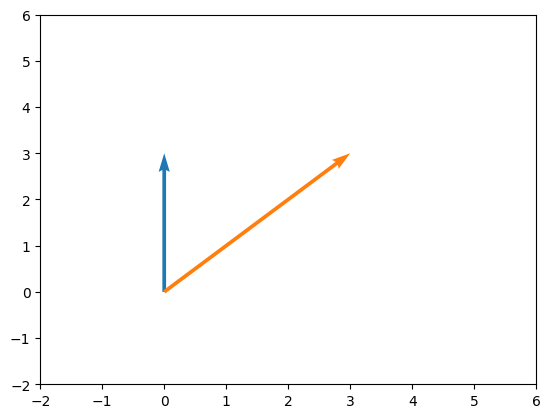

In [14]:

plt.quiver([v1[0],v2[0]],
           [v1[1],v2[1]],
           [v1[2],v2[2]],
           [v1[3],v2[3]],
           angles = 'xy' , scale_units = 'xy', scale = 1,
           color = sns.color_palette() 
          )

plt.xlim(-2,6)
plt.ylim(-2,6)


El angulo entre ambos vectores es $\theta = 45°$, veamos a continuación que se cumple la igualdad.

In [15]:
v1 = np.array([0,3])
v2 = np.array([3,3])
              
print(v1.T.dot(v2))

9


In [16]:
norma_v1 = np.linalg.norm(v1)
norma_v2 = np.linalg.norm(v2)

print(norma_v1 * norma_v2 * np.cos(np.deg2rad(45)))

9.0


# Matrices y vectores especiales

### Matriz diagonal y matriz simétrica
Ya vimos matrices especiales como:
- La matriz identidad $I$ (diagonal llena de 1 y el resto 0)
- La matriz inversa $A^{-1}$ (aquella que satisface $AA^{-1} = A^{-1}A = I$)
- La matriz singular (aquellas que no tienen inversa)

La matriz diagonal es una matriz que solo tiene valores en la diagonal y el resto es cero. Un ejemplo es:
 $$diag = \begin{pmatrix}
 1& 0 & 0\\ 
 0& 2 & 0\\ 
 0& 0 & 3
\end{pmatrix}$$


In [21]:
vector = np.array([1,2,3,4,5])
matriz = np.diag(vector)

print(matriz)


[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [25]:
# existen matrices diagonales pero no cuadradas
matriz[0:4, 0:3]

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3],
       [0, 0, 0]])

In [24]:
# otra matriz diagonal
matriz[0:3, 0:4]

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0]])

Una propiedad de las matrices diagonales es que al multiplicarlas por un vector, el resultado es multiplicar cada elemento de la diagonal, por cada elemento del vector:
$$  \begin{pmatrix}
 a_{1}& 0 & 0\\ 
 0& a_{2} & 0\\ 
 0& 0 & a_3
\end{pmatrix}  \begin{pmatrix}
 x_{1}\\ 
 x_{2}\\ 
 x_{3}
\end{pmatrix} =  \begin{pmatrix}
 a_1x_{1}\\ 
 a_2x_{2}\\ 
 a_3x_{3}
\end{pmatrix}$$

In [27]:
v2 = np.array([1,1,1,1,1])

matriz.dot(v2.T)

array([1, 2, 3, 4, 5])

Otra propiedad de las matrices diagonales es que su inversa es tambien una matriz diagonal, cuyas entradas son los inversas de la matriz original; es decir:
$$Si \; A = \begin{pmatrix}
 a_{1}& 0 & 0\\ 
 0& a_{2} & 0\\ 
 0& 0 & a_3
\end{pmatrix} \Longrightarrow A^{-1} = \begin{pmatrix}
 1/a_{1}& 0 & 0\\ 
 0& 1/a_{2} & 0\\ 
 0& 0 & 1/a_3
\end{pmatrix}$$

In [30]:
matriz_inv = np.diag(np.array([1, 1/2, 1/3, 1/4, 1/5]))
print(matriz.dot(matriz_inv)) #recuperamos la matriz identidad

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Por otro lado, una matriz simétrica es aquella que satisface $A = A^{T}$

In [34]:
simetrica = np.array([[1,2,3],[2,-1,7], [3,7,11]])
simetrica

array([[ 1,  2,  3],
       [ 2, -1,  7],
       [ 3,  7, 11]])

In [36]:
#calculando su transpuesta
simetrica.T

array([[ 1,  2,  3],
       [ 2, -1,  7],
       [ 3,  7, 11]])

Propiedades:
- Una matriz diagonal es simétrica
- Si $A,B$ son simetricas, entonces $(AB)^{T} =B^TA^T = BA$

### 

### Vectores y matrices ortogonales

Los vectores orgonales son aquellos que forman 90° entre sí. Tienen una propiedad:
- Si $v_1,v_2$ son ortogonales, entonces $v_1 \cdot v_2^T = 0$

Un vector ortonormal es un vector ortogonal con norma = 1.

In [37]:
# vectores ortogonales


(-3.0, 3.0)

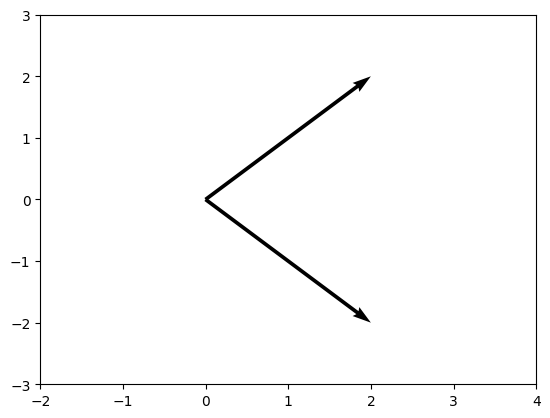

In [39]:
v1 = np.array([0,0,2,2])
v2 = np.array([0,0,2,-2])

plt.quiver([v1[0],v2[0]],
           [v1[1],v2[1]],
           [v1[2],v2[2]],
           [v1[3],v2[3]],
           angles = 'xy' , scale_units = 'xy', scale = 1
          )

plt.xlim(-2,4)
plt.ylim(-3,3)


In [41]:
# realizamos el producto interno
v1 = np.array([2,2])
v2 = np.array([2,-2])
v1.dot(v2.T)

0

In [42]:
# vectores ortonormales
v1 = np.array([1,0])
v2 = np.array([0,1])
v1.dot(v2.T)

0

Una matriz es ortogonal cuando todas sus filas son ortogonales entre si y las columnas son ortogonales entre si. Además de que las filas y columnas forman vectores unitarios. 

In [43]:
matriz = np.array([[1,0,0], [0,1,0], [0,0,1]])
matriz

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [45]:
# realizaremos el producto interno entre la primera y segunda columna
matriz[:,0].dot(matriz[:,1])

0

In [46]:
# realizaremos el producto interno entre la primera y tercera columna
matriz[:,0].dot(matriz[:,2])

0

In [47]:
# realizaremos el producto interno entre la segunda y tercera columna
matriz[:,1].dot(matriz[:,2])

0

In [48]:
# las filas tambien son ortogonales

print(matriz[0,:].dot(matriz[1,:]))  #primera y segunda
print(matriz[0,:].dot(matriz[2,:]))  #primera y tercera
print(matriz[1,:].dot(matriz[2,:]))  #segunda y tercera

0
0
0


Una propiedad de las matrices ortogonales:
$$A^T A = AA^T = I $$
$$A^T = A^{-1} $$

In [49]:
# Ejemplo
A = np.array([[np.cos(100), -np.sin(100)],
              [np.sin(100), np.cos(100)]])
A

array([[ 0.86231887,  0.50636564],
       [-0.50636564,  0.86231887]])

In [50]:
#normas
print(np.linalg.norm(A[:,0])) #primera columna
print(np.linalg.norm(A[:,1])) #segunda columna
print(np.linalg.norm(A[0,:])) #primera fila
print(np.linalg.norm(A[1,:])) #segunda fila

0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999


In [52]:
# veamos si son ortogonales

print(A[:,0].dot(A[:,1]))  #primera y segunda columna
print(A[0,:].dot(A[1,:]))  #primera y segunda fila


0.0
0.0


In [55]:
# por lo tanto es ortogonal, calculamos ahora la transpuesta
A_t = A.T
print(A_t.dot(A))
print('\n')
print(A.dot(A_t))

[[ 1.00000000e+00 -7.93771519e-18]
 [-7.93771519e-18  1.00000000e+00]]


[[1.00000000e+00 7.93771519e-18]
 [7.93771519e-18 1.00000000e+00]]


In [57]:
# calculando la inversa
A_inv = np.linalg.inv(A)
print(A_t)
print('\n')
print(A_inv)

[[ 0.86231887 -0.50636564]
 [ 0.50636564  0.86231887]]


[[ 0.86231887 -0.50636564]
 [ 0.50636564  0.86231887]]


# El determinante y la traza


La traza de una matriz cuadrada está definida como la suma de los elementos de una diagonal:
$$ Si \; A = \begin{pmatrix}
 a_{11} & a_{12} & a_{13}\\ 
 a_{21} & a_{22} & a_{23}\\ 
 a_{31}& a_{32} & a_{33}
\end{pmatrix} \Longrightarrow tr(A) =  a_{11} +  a_{22} + a_{33}$$

In [58]:
matriz = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

matriz

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [59]:
traza = np.trace(matriz)
traza

15

In [60]:
%run "./funciones_aux/graficarvectores.ipynb"

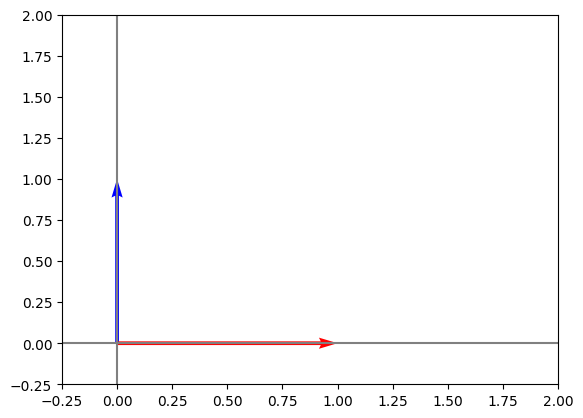

In [62]:
v1 = np.array([0,1])
v2 = np.array([1,0])

graficarvector([v1,v2], ['b', 'r'])
plt.xlim(-0.25,2)
plt.ylim(-0.25,2)
plt.show()

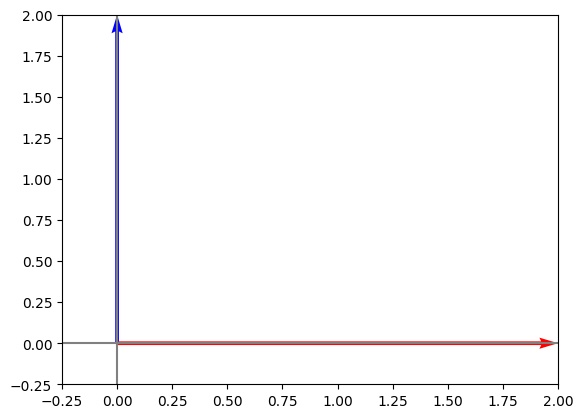

In [63]:
A = np.array([[2,0],[0,2]])

v1_transformado = A.dot(v1)
v2_transformado = A.dot(v2)

graficarvector([v1_transformado,v2_transformado], ['b', 'r'])
plt.xlim(-0.25,2)
plt.ylim(-0.25,2)
plt.show()


El determinante de una matriz cuadrada es un número real que no da información de la transformación que produce una matriz en su espacio. En el caso de un plano nos dice como varían las áreas en el plano.

In [89]:
matriz = np.array([[-7,1],[-3,1]])
vector = np.array([[2],[5]])
matriz

array([[-7,  1],
       [-3,  1]])

In [92]:
x = np.linalg.inv(matriz).dot(vector)
x

array([[0.75],
       [7.25]])

In [94]:
A.dot(x)

array([[ 1.5],
       [14.5]])

In [95]:
a = 5
a.shape

AttributeError: 'int' object has no attribute 'shape'

In [96]:
v = np.array([7,-7,3])
u = np.array([1,1,0])
w = np.array([0,0,1])

In [97]:
v.dot(u)

0

In [98]:
u.dot(w)

0

In [99]:
v.dot(w)

3